In [3]:
import glob

import h5py

In [8]:
%ll ../..

total 25971624
drwxr-xr-x 12 zaccharie        4096 avril 29 21:37 astra-toolbox/
drwxr-xr-x  6 zaccharie        4096 juin  28 14:25 fastmri-reproducible-benchmark/
drwxr-xr-x  9 zaccharie        4096 mai    8 19:45 learned_primal_dual/
drwxr-xr-x  3 zaccharie        4096 juin  28 13:03 local-machine-setup/
drwxr-xr-x  9 zaccharie        4096 mai   15 22:00 ModOpt/
drwxr-xr-x 16 zaccharie        4096 mai   15 20:56 nfft-3.5.0/
-rw-r--r--  1 zaccharie     5175253 janv. 28 14:38 nfft-3.5.0.tar.gz
drwxr-xr-x 11 zaccharie        4096 mai   15 19:24 odl/
-rw-r--r--  1 zaccharie          27 avril  1 18:58 package-lock.json
drwxr-xr-x 11 zaccharie        4096 juin  28 14:23 pysap/
drwxr-xr-x  5 zaccharie        4096 juin  28 14:23 pysap-astro/
drwxr-xr-x  9 zaccharie        4096 mai   15 12:16 pysap-mri/
drwxr-xr-x  2 zaccharie        4096 juin  17 19:11 singlecoil_test/
-rw-r--r--  1 zaccharie 26589691904 juin  28 14:36 singlecoil_train.tar.gz
drwxr-xr-x  2 zaccharie       12288 nov.  23  201

In [9]:
val_path = '../../singlecoil_val/'
test_path = '../../singlecoil_test/'

In [10]:
filenames = glob.glob(test_path + '*')

In [25]:
def from_file_to_mask_and_kspace(filename):
    h5_obj = h5py.File(filename)
    mask = h5_obj['mask'][()]
    kspace = h5_obj['kspace'][()]
    return mask, kspace

In [26]:
file_0 = filenames[0]
mask, kspace = from_file_to_mask_and_kspace(file_0)

In [27]:
mask.shape

(372,)

In [28]:
kspace.shape

(36, 640, 372)

In [29]:
import numpy as np

In [32]:
for i in range(36):
    for j in range(372):
        if not mask[j] and np.linalg.norm(kspace[i, :, j]) != 0:
            print(np.linalg.norm(kspace[i, :, j]))
            print('Fail')
            print(i, j)
            break

In [33]:
%matplotlib nbagg
import matplotlib.pyplot as plt

In [34]:
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['image.cmap'] = 'gray'

In [42]:
372 / np.sum(mask)

8.857142857142858

<IPython.core.display.Javascript object>


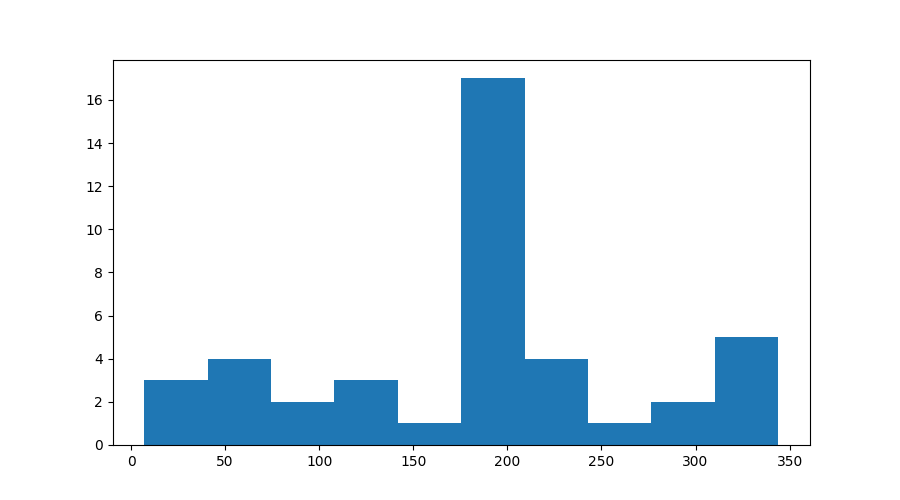

(array([ 3.,  4.,  2.,  3.,  1., 17.,  4.,  1.,  2.,  5.]),
 array([  7. ,  40.7,  74.4, 108.1, 141.8, 175.5, 209.2, 242.9, 276.6,
        310.3, 344. ]),
 <a list of 10 Patch objects>)

In [37]:
plt.hist(np.where(mask))